<a href="https://colab.research.google.com/github/genarioazevedoufape/atividades_pet_data_science/blob/main/Sauter_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt

from statsmodels.graphics.tsaplots import plot_acf

import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings('ignore')

## Importação dos Dados

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = '/content/drive/My Drive/PET DATA SCIENCE - 2024/M5_full.parquet'

In [4]:
df = pd.read_parquet(path)

In [5]:
df

,id,item_id,dept_id,cat_id,store_id,state_id,value,date
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29
...,...,...,...,...,...,...,...,...
59181085,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,1,2016-05-22
59181086,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,2016-05-22
59181087,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,2,2016-05-22
59181088,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,2016-05-22


## Pré-processamento dos Dados

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59181090 entries, 0 to 59181089
Data columns (total 8 columns):
 #   Column    Dtype   
---  ------    -----   
 0   id        category
 1   item_id   category
 2   dept_id   category
 3   cat_id    category
 4   store_id  category
 5   state_id  category
 6   value     int16   
 7   date      object  
dtypes: category(6), int16(1), object(1)
memory usage: 1017.2+ MB


In [7]:
df.isna().sum()

id          0
item_id     0
dept_id     0
cat_id      0
store_id    0
state_id    0
value       0
date        0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
df['mes'] = df['date'].dt.month
df['ano'] = df['date'].dt.year

In [11]:
df.set_index('date', inplace=True)

In [12]:
df

,id,item_id,dept_id,cat_id,store_id,state_id,value,mes,ano
date,,,,,,,,,
2011-01-29,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,1,2011
2011-01-29,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,1,2011
2011-01-29,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,1,2011
2011-01-29,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,1,2011
2011-01-29,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,1,2011
...,...,...,...,...,...,...,...,...,...
2016-05-22,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,1,5,2016
2016-05-22,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,5,2016
2016-05-22,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,2,5,2016


## Estatísticas Descritivas

In [13]:
df['value'].describe()

count    5.918109e+07
mean     1.130888e+00
std      3.870038e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      7.630000e+02
Name: value, dtype: float64

In [14]:
df[['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']].describe()

,id,item_id,dept_id,cat_id,store_id,state_id
count,59181090,59181090,59181090,59181090,59181090,59181090
unique,30490,3049,7,3,10,3
top,FOODS_1_001_CA_1_evaluation,FOODS_1_001,FOODS_3,FOODS,CA_1,CA
freq,1941,19410,15974430,27892170,5918109,23672436


## Visualização de Dados

In [15]:
dados_mensais = df.groupby(['ano', 'mes'])['value'].sum().reset_index()

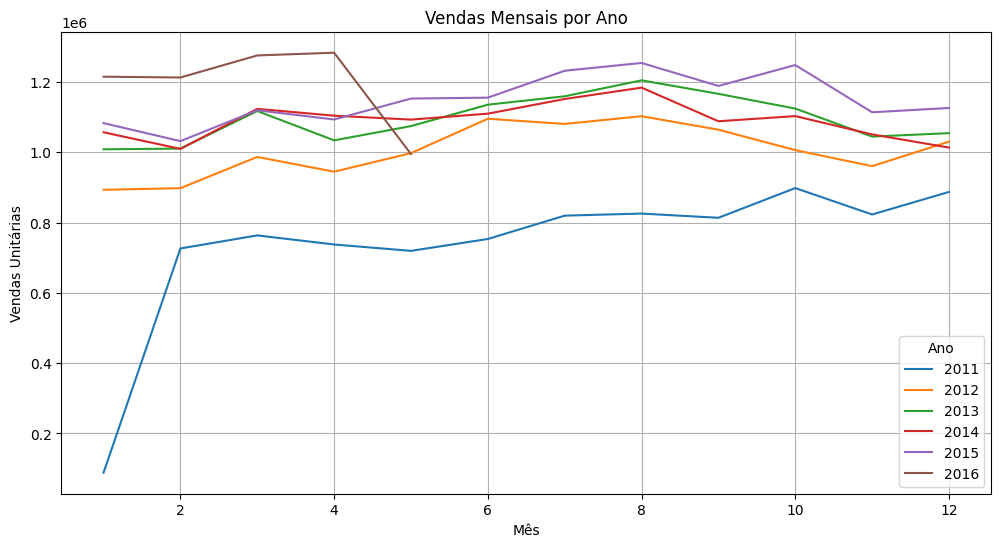

In [16]:
plt.figure(figsize=(12, 6))
for ano in dados_mensais['ano'].unique():
    df_ano = dados_mensais[dados_mensais['ano'] == ano]
    plt.plot(df_ano['mes'], df_ano['value'], label=f'{ano}')

plt.title('Vendas Mensais por Ano')
plt.xlabel('Mês')
plt.ylabel('Vendas Unitárias')
plt.legend(title='Ano')
plt.grid(True)
plt.show()

In [18]:
pivot_table = dados_mensais.pivot(index='mes', columns='ano', values='value')

<Figure size 1600x600 with 0 Axes>

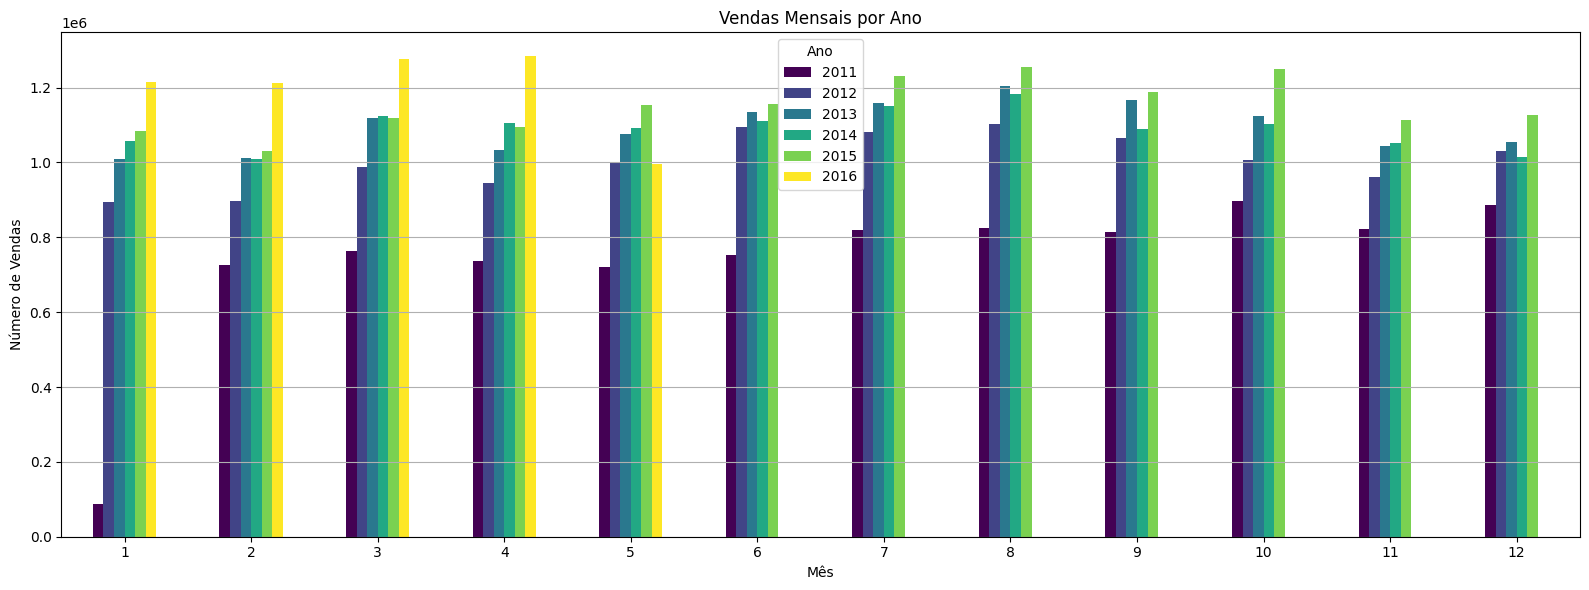

In [19]:
plt.figure(figsize=(16, 6))
pivot_table.plot(kind='bar', figsize=(16, 6), colormap='viridis')
plt.xlabel('Mês')
plt.ylabel('Número de Vendas')
plt.title('Vendas Mensais por Ano')
plt.xticks(rotation=0)
plt.legend(title='Ano')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

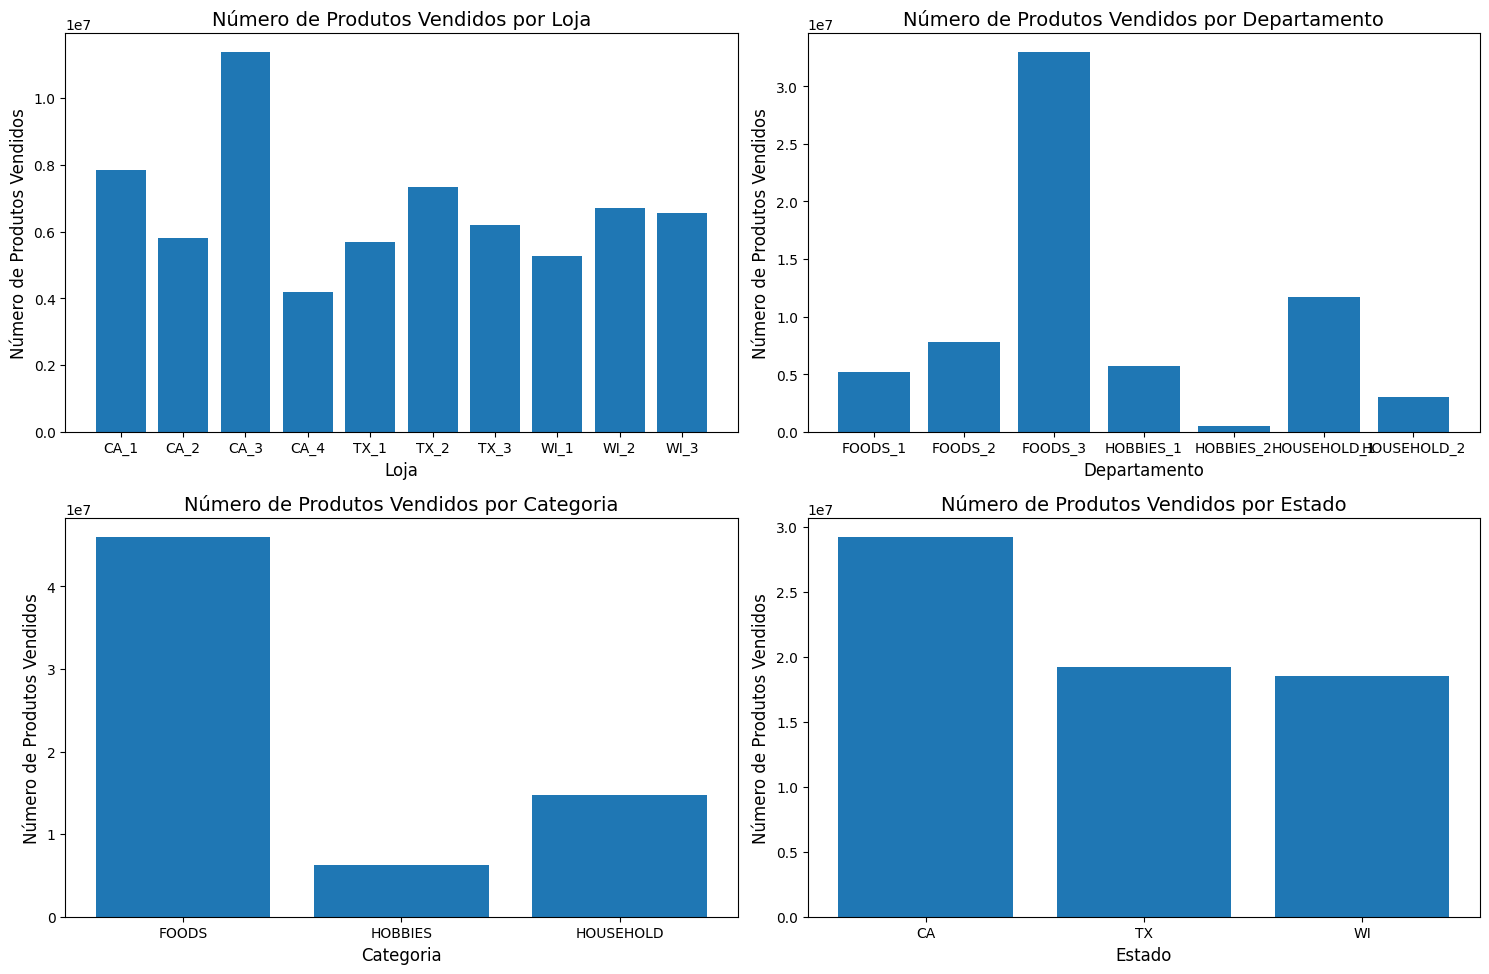

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

vendas_por_loja = df.groupby('store_id')['value'].sum()
axs[0, 0].bar(vendas_por_loja.index, vendas_por_loja.values)
axs[0, 0].set_xlabel('Loja', fontsize=12)
axs[0, 0].set_ylabel('Número de Produtos Vendidos', fontsize=12)
axs[0, 0].set_title('Número de Produtos Vendidos por Loja', fontsize=14)

vendas_por_departamento = df.groupby('dept_id')['value'].sum()
axs[0, 1].bar(vendas_por_departamento.index, vendas_por_departamento.values)
axs[0, 1].set_xlabel('Departamento', fontsize=12)
axs[0, 1].set_ylabel('Número de Produtos Vendidos', fontsize=12)
axs[0, 1].set_title('Número de Produtos Vendidos por Departamento', fontsize=14)

vendas_por_categoria = df.groupby('cat_id')['value'].sum()
axs[1, 0].bar(vendas_por_categoria.index, vendas_por_categoria.values)
axs[1, 0].set_xlabel('Categoria', fontsize=12)
axs[1, 0].set_ylabel('Número de Produtos Vendidos', fontsize=12)
axs[1, 0].set_title('Número de Produtos Vendidos por Categoria', fontsize=14)

vendas_por_estado = df.groupby('state_id')['value'].sum()
axs[1, 1].bar(vendas_por_estado.index, vendas_por_estado.values)
axs[1, 1].set_xlabel('Estado', fontsize=12)
axs[1, 1].set_ylabel('Número de Produtos Vendidos', fontsize=12)
axs[1, 1].set_title('Número de Produtos Vendidos por Estado', fontsize=14)

plt.tight_layout()
plt.show()

In [21]:
dados_agrupados = df.groupby('item_id')['value'].sum().sort_values(ascending=False)
itens_mais_vendidos = dados_agrupados.head(100)

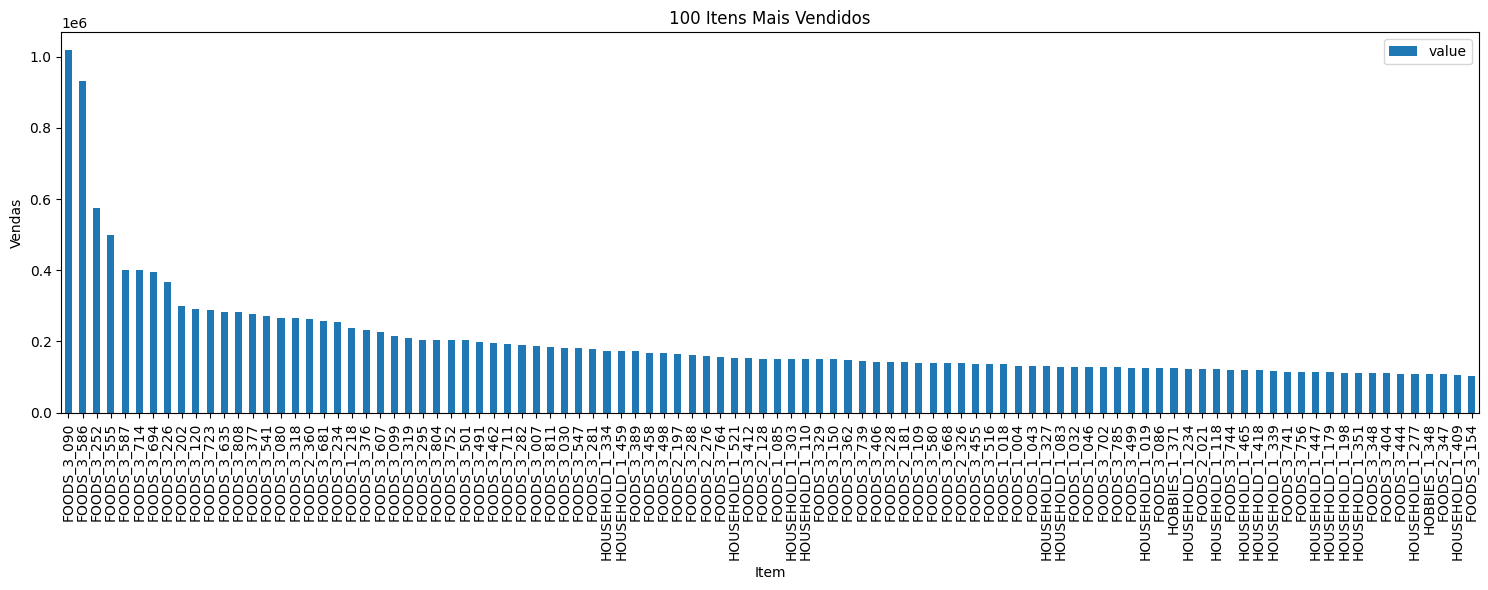

In [22]:
plt.figure(figsize=(15, 6))
itens_mais_vendidos.plot(kind='bar')
plt.title('100 Itens Mais Vendidos')
plt.xlabel('Item')
plt.ylabel('Vendas')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [23]:
venda_top_100 = itens_mais_vendidos.sum()
venda_total = df['value'].sum()
porcentagem = (venda_top_100 / venda_total) * 100

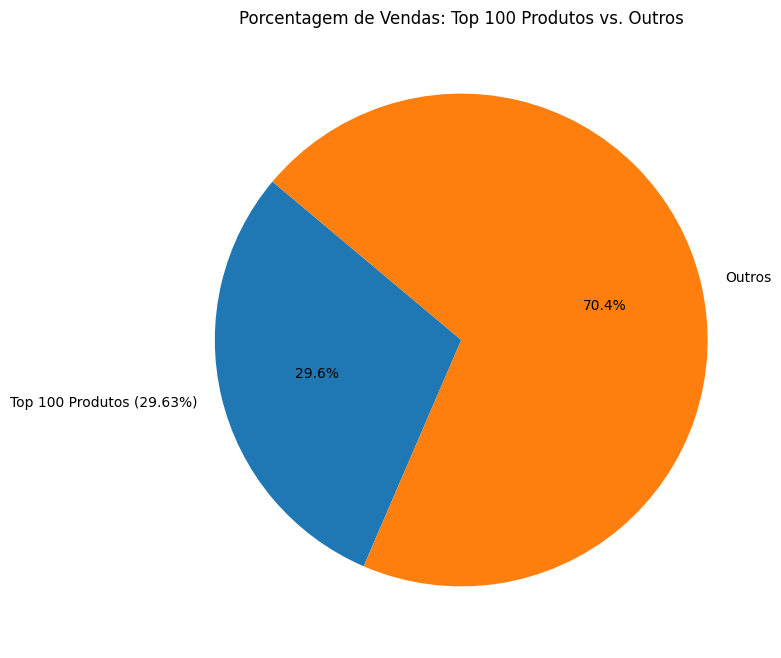

In [24]:
plt.figure(figsize=(8, 8))
plt.pie([porcentagem, 100 - porcentagem], labels=[f'Top 100 Produtos ({porcentagem:.2f}%)', 'Outros'], autopct='%1.1f%%', startangle=140)
plt.title('Porcentagem de Vendas: Top 100 Produtos vs. Outros')
plt.show()

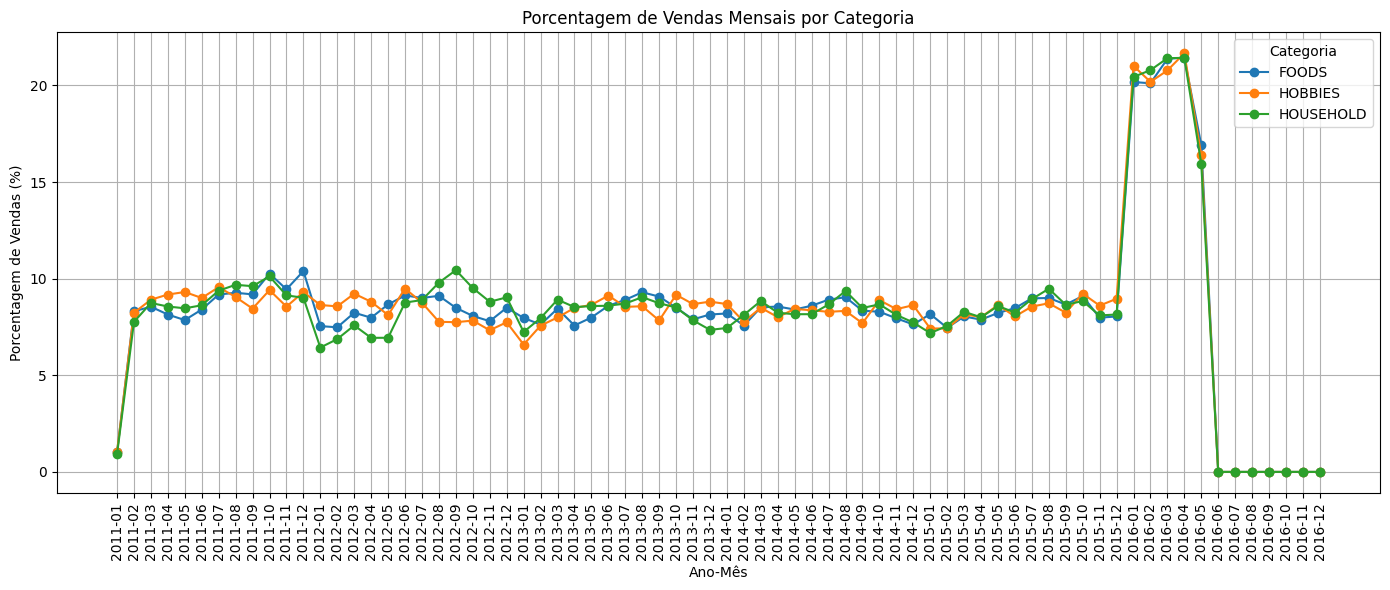

In [25]:
df_mensal = df.groupby(['cat_id', 'ano', 'mes'])['value'].sum().reset_index()
df_mensal['ano_mes'] = df_mensal['ano'].astype(str) + '-' + df_mensal['mes'].astype(str).str.zfill(2)

# Calculando o total de vendas mensais por categoria
df_mensal['total_mes'] = df_mensal.groupby(['cat_id', 'ano'])['value'].transform('sum')

# Calculando a porcentagem de vendas mensais por categoria
df_mensal['percentagem'] = (df_mensal['value'] / df_mensal['total_mes']) * 100

# Plotando os dados
plt.figure(figsize=(14, 6))

categories = df_mensal['cat_id'].unique()
for category in categories:
    category_data = df_mensal[df_mensal['cat_id'] == category]
    plt.plot(category_data['ano_mes'], category_data['percentagem'], marker='o', label=category)

plt.xticks(rotation=90)
plt.xlabel('Ano-Mês')
plt.ylabel('Porcentagem de Vendas (%)')
plt.title('Porcentagem de Vendas Mensais por Categoria')
plt.legend(title='Categoria')
plt.grid(True)
plt.tight_layout()
plt.show()

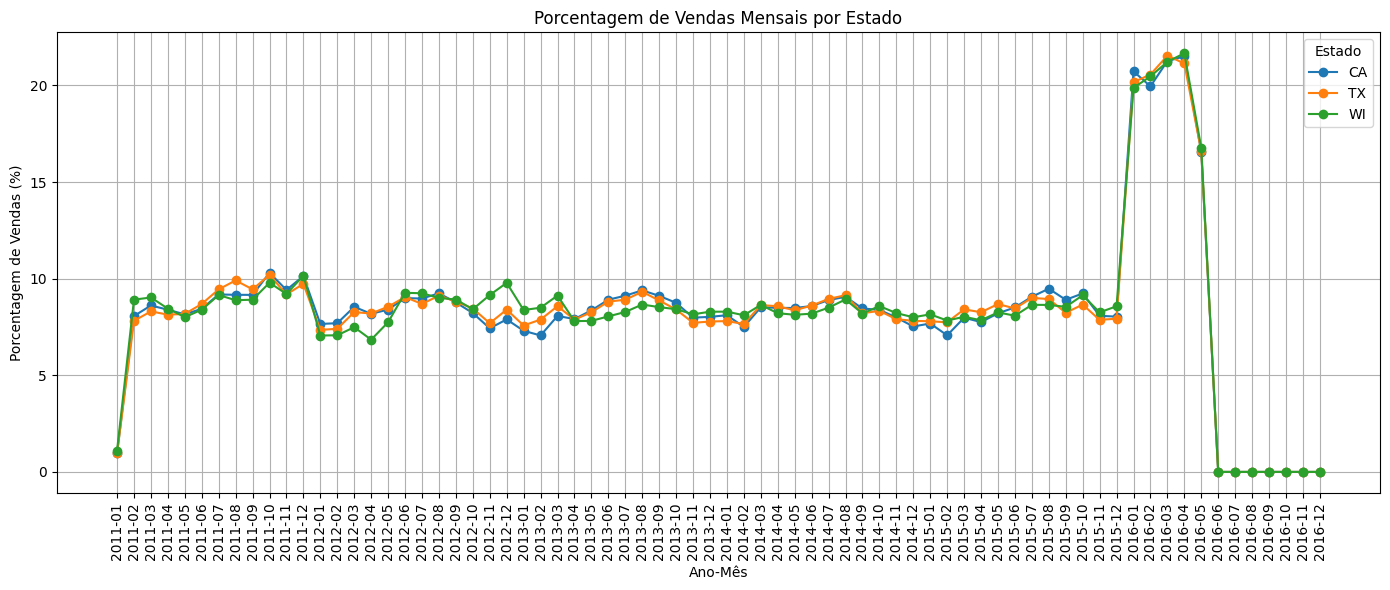

In [26]:
df_mensal = df.groupby(['state_id', 'ano', 'mes'])['value'].sum().reset_index()
df_mensal['ano_mes'] = df_mensal['ano'].astype(str) + '-' + df_mensal['mes'].astype(str).str.zfill(2)

df_mensal['total_mes'] = df_mensal.groupby(['state_id', 'ano'])['value'].transform('sum')

df_mensal['percentagem'] = (df_mensal['value'] / df_mensal['total_mes']) * 100

plt.figure(figsize=(14, 6))

states = df_mensal['state_id'].unique()
for state in states:
    state_data = df_mensal[df_mensal['state_id'] == state]
    plt.plot(state_data['ano_mes'], state_data['percentagem'], marker='o', label=state)

plt.xticks(rotation=90)
plt.xlabel('Ano-Mês')
plt.ylabel('Porcentagem de Vendas (%)')
plt.title('Porcentagem de Vendas Mensais por Estado')
plt.legend(title='Estado')
plt.grid(True)
plt.tight_layout()
plt.show()

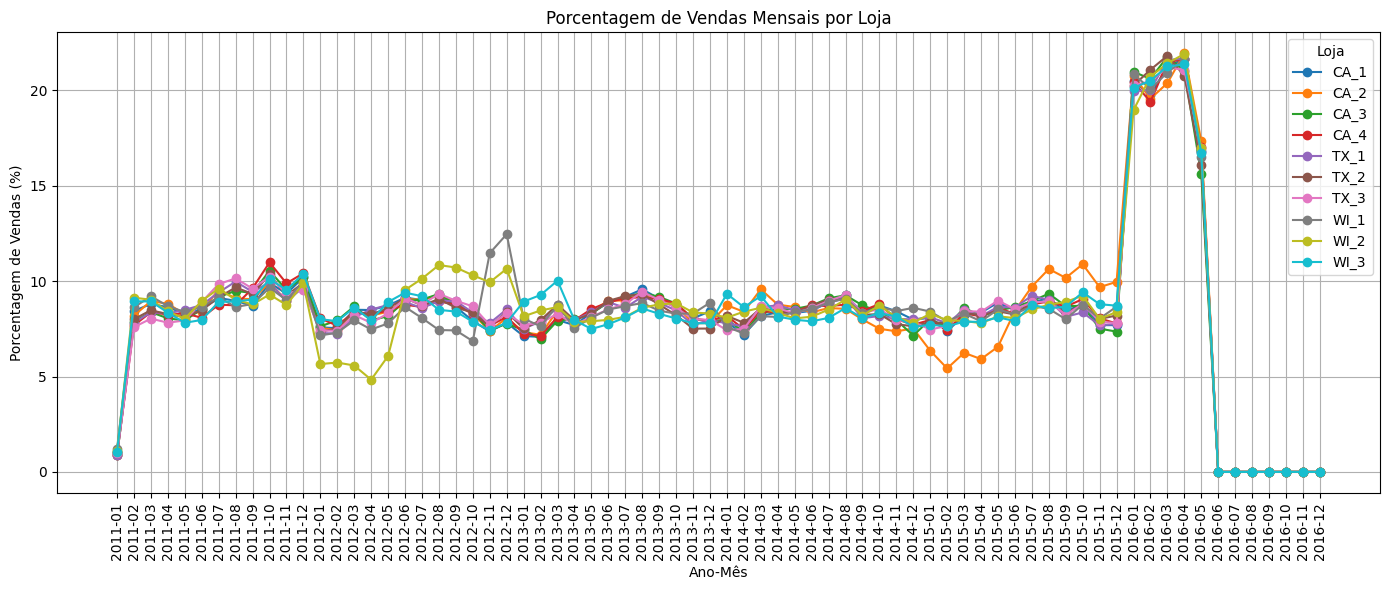

In [28]:
df_mensal = df.groupby(['store_id', 'ano', 'mes'])['value'].sum().reset_index()
df_mensal['ano_mes'] = df_mensal['ano'].astype(str) + '-' + df_mensal['mes'].astype(str).str.zfill(2)

df_mensal['total_mes'] = df_mensal.groupby(['store_id', 'ano'])['value'].transform('sum')

df_mensal['percentagem'] = (df_mensal['value'] / df_mensal['total_mes']) * 100

plt.figure(figsize=(14, 6))

stores = df_mensal['store_id'].unique()
for store in stores:
    store_data = df_mensal[df_mensal['store_id'] == store]
    plt.plot(store_data['ano_mes'], store_data['percentagem'], marker='o', label=store)

plt.xticks(rotation=90)
plt.xlabel('Ano-Mês')
plt.ylabel('Porcentagem de Vendas (%)')
plt.title('Porcentagem de Vendas Mensais por Loja')
plt.legend(title='Loja')
plt.grid(True)
plt.tight_layout()
plt.show()

## Identificação de Outliers

In [29]:
# Q1 (25º percentil) e Q3 (75º percentil)
Q1 = df['value'].quantile(0.25)
Q3 = df['value'].quantile(0.75)

# IQR (Interquartile Range)
IQR = Q3 - Q1

# limites para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar os outliers
outliers = df[(df['value'] < limite_inferior) | (df['value'] > limite_superior)]

In [30]:
print(f"Outliers encontrados: {len(outliers)}")
print(outliers)


Outliers encontrados: 7037502
                                       id        item_id    dept_id   cat_id  \
date                                                                           
2011-01-29  HOBBIES_1_008_CA_1_evaluation  HOBBIES_1_008  HOBBIES_1  HOBBIES   
2011-01-29  HOBBIES_1_015_CA_1_evaluation  HOBBIES_1_015  HOBBIES_1  HOBBIES   
2011-01-29  HOBBIES_1_016_CA_1_evaluation  HOBBIES_1_016  HOBBIES_1  HOBBIES   
2011-01-29  HOBBIES_1_032_CA_1_evaluation  HOBBIES_1_032  HOBBIES_1  HOBBIES   
2011-01-29  HOBBIES_1_044_CA_1_evaluation  HOBBIES_1_044  HOBBIES_1  HOBBIES   
...                                   ...            ...        ...      ...   
2016-05-22    FOODS_3_804_WI_3_evaluation    FOODS_3_804    FOODS_3    FOODS   
2016-05-22    FOODS_3_811_WI_3_evaluation    FOODS_3_811    FOODS_3    FOODS   
2016-05-22    FOODS_3_812_WI_3_evaluation    FOODS_3_812    FOODS_3    FOODS   
2016-05-22    FOODS_3_821_WI_3_evaluation    FOODS_3_821    FOODS_3    FOODS   
2016-05-22

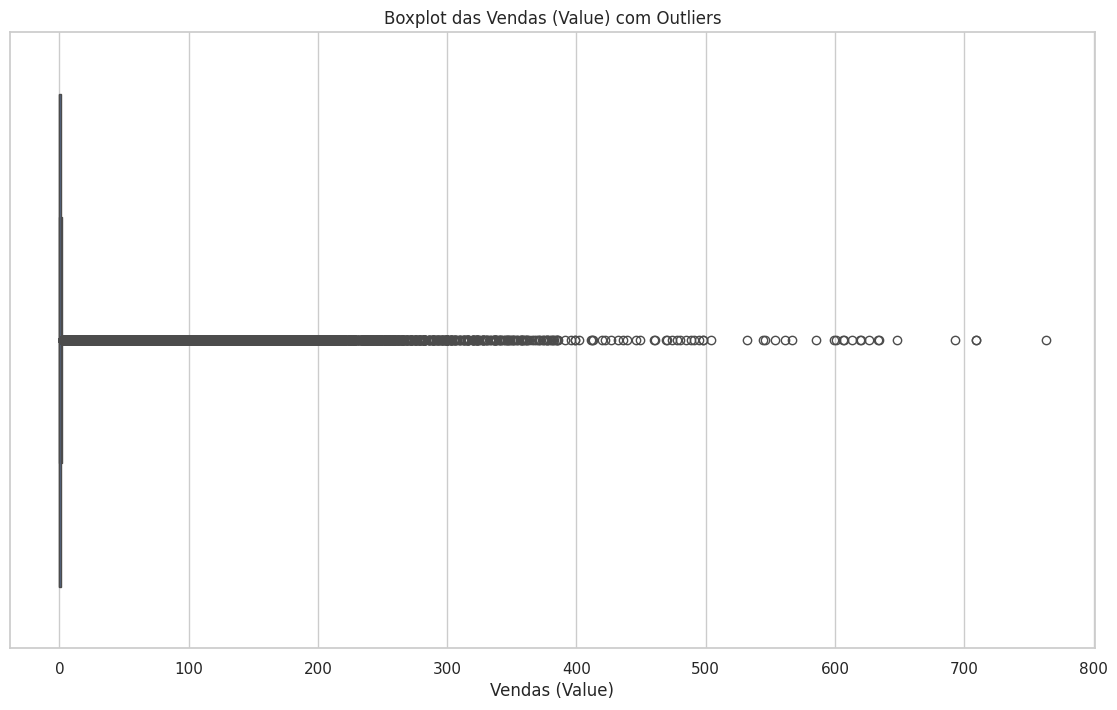

In [31]:
sns.set(style="whitegrid")

# Criar o boxplot para visualizar os outliers
plt.figure(figsize=(14, 8))
sns.boxplot(x=df['value'])
plt.title('Boxplot das Vendas (Value) com Outliers')
plt.xlabel('Vendas (Value)')
plt.show()

###Média Movel

In [32]:
media_mensal = df['value'].resample('M').mean()
media_movel_mensal = media_mensal.rolling(window=3).mean()

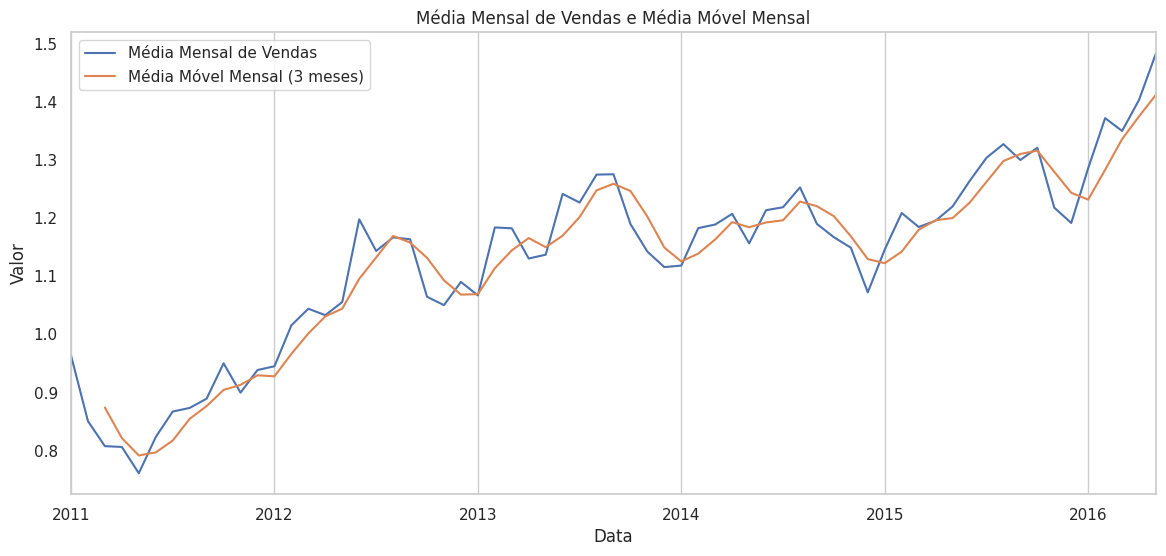

In [33]:
plt.figure(figsize=(14, 6))
media_mensal.plot(label='Média Mensal de Vendas', )
media_movel_mensal.plot(label='Média Móvel Mensal (3 meses)', style='-')
plt.title('Média Mensal de Vendas e Média Móvel Mensal')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.grid(axis='y')
plt.show()

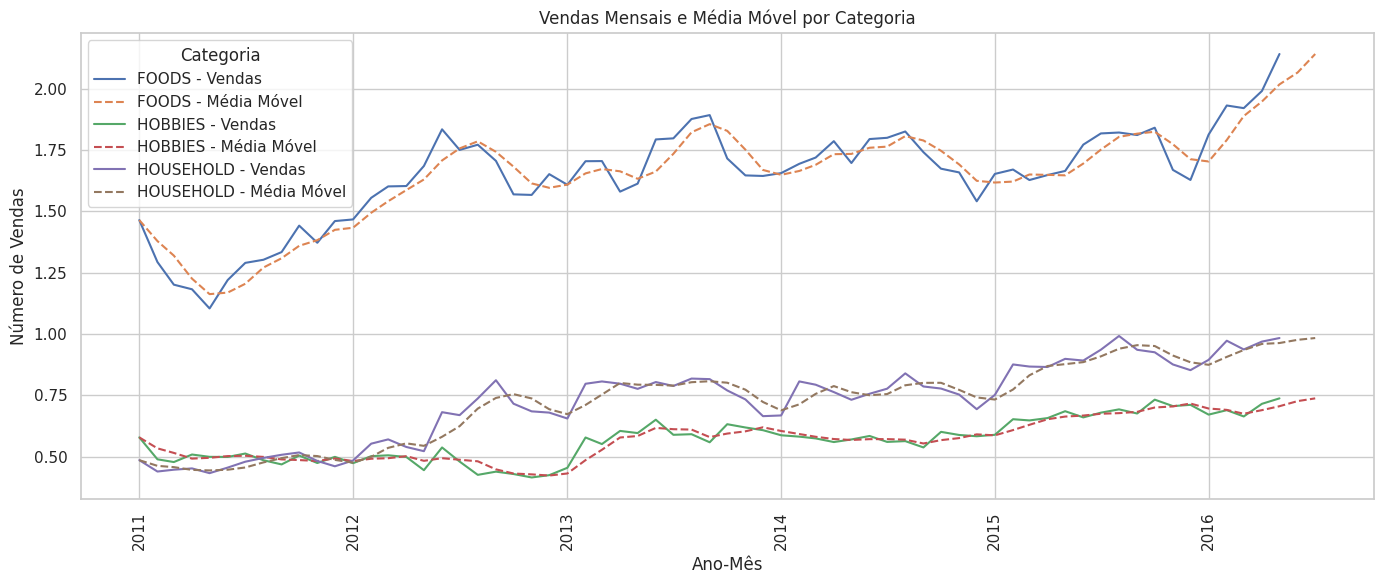

In [34]:
# Agrupando e calculando a média das vendas mensais por categoria, ano e mês
df_mensal = df.groupby(['cat_id', 'ano', 'mes'])['value'].mean().reset_index()
df_mensal['ano_mes'] = pd.to_datetime(df_mensal['ano'].astype(str) + '-' + df_mensal['mes'].astype(str).str.zfill(2))
df_mensal = df_mensal.sort_values('ano_mes')

# Calculando a média móvel usando rolling window de 3 meses
df_mensal['media_movel'] = df_mensal.groupby('cat_id')['value'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

plt.figure(figsize=(14, 6))
categories = df_mensal['cat_id'].unique()
for category in categories:
    category_data = df_mensal[df_mensal['cat_id'] == category]
    plt.plot(category_data['ano_mes'], category_data['value'], label=f'{category} - Vendas')
    plt.plot(category_data['ano_mes'], category_data['media_movel'], linestyle='--', label=f'{category} - Média Móvel')

plt.xticks(rotation=90)
plt.xlabel('Ano-Mês')
plt.ylabel('Número de Vendas')
plt.title('Vendas Mensais e Média Móvel por Categoria')
plt.legend(title='Categoria')
plt.grid(True)
plt.tight_layout()
plt.show()

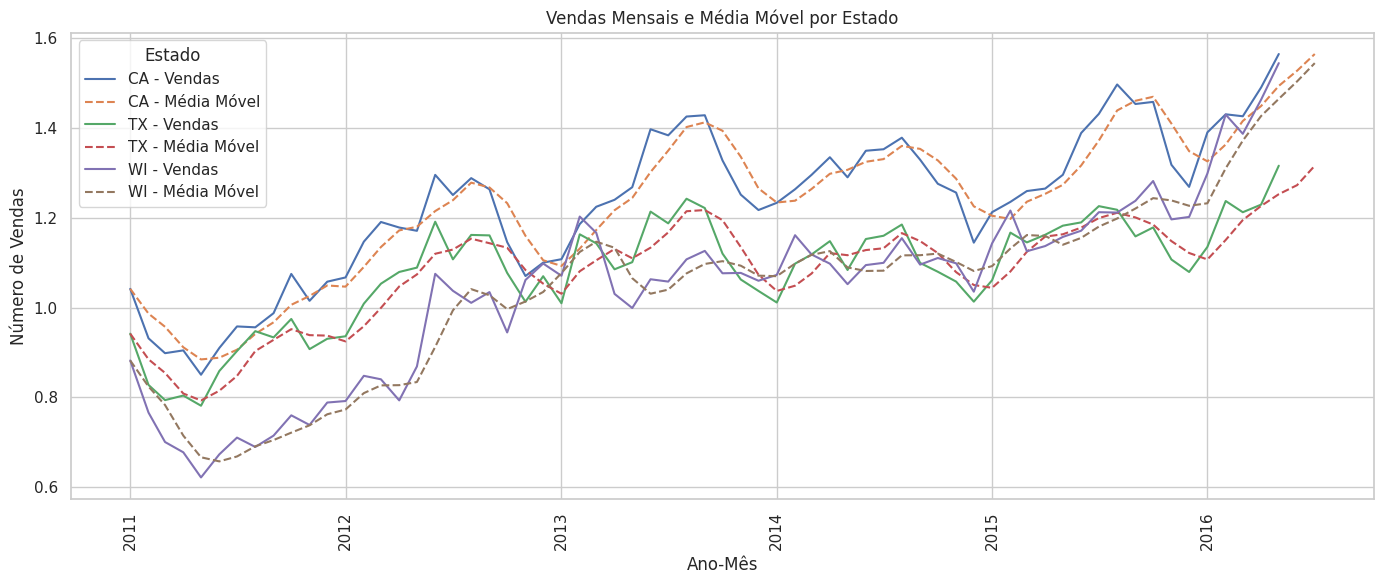

In [35]:
df_mensal = df.groupby(['state_id', 'ano', 'mes'])['value'].mean().reset_index()
df_mensal['ano_mes'] = pd.to_datetime(df_mensal['ano'].astype(str) + '-' + df_mensal['mes'].astype(str).str.zfill(2))
df_mensal = df_mensal.sort_values('ano_mes')

df_mensal['media_movel'] = df_mensal.groupby('state_id')['value'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

plt.figure(figsize=(14, 6))
states = df_mensal['state_id'].unique()
for state in states:
    state_data = df_mensal[df_mensal['state_id'] == state]
    plt.plot(state_data['ano_mes'], state_data['value'], label=f'{state} - Vendas')
    plt.plot(state_data['ano_mes'], state_data['media_movel'], linestyle='--', label=f'{state} - Média Móvel')

plt.xticks(rotation=90)
plt.xlabel('Ano-Mês')
plt.ylabel('Número de Vendas')
plt.title('Vendas Mensais e Média Móvel por Estado')
plt.legend(title='Estado')
plt.grid(True)
plt.tight_layout()
plt.show()

##  Análise de Séries Temporais

### Decomposição Sazonal

In [36]:
media_mensal = df['value'].resample('M').mean()

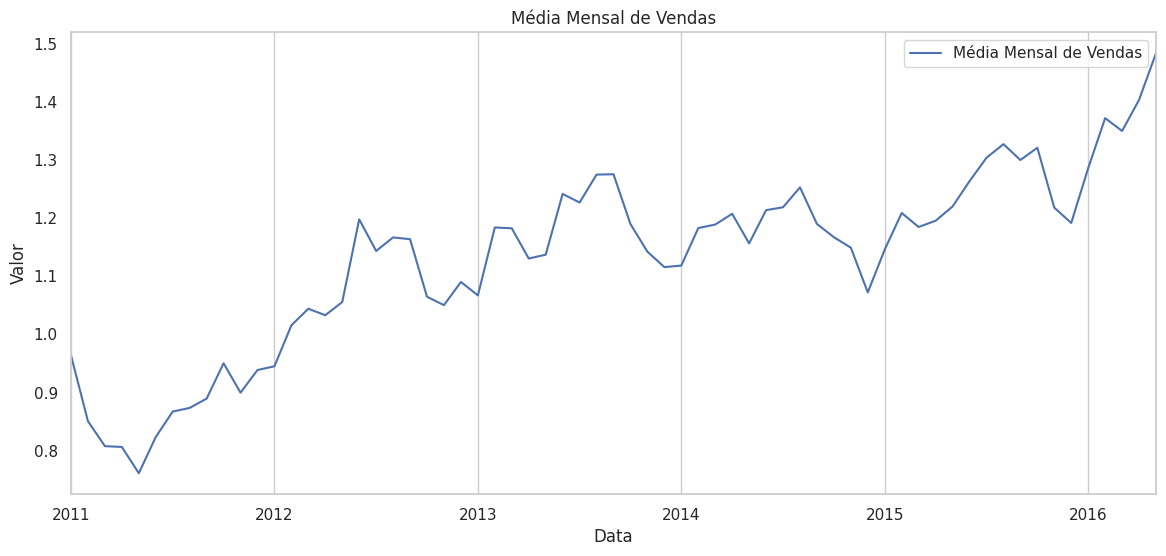

In [37]:
plt.figure(figsize=(14, 6))
media_mensal.plot(label='Média Mensal de Vendas', )
plt.title('Média Mensal de Vendas')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.grid(axis='y')
plt.show()

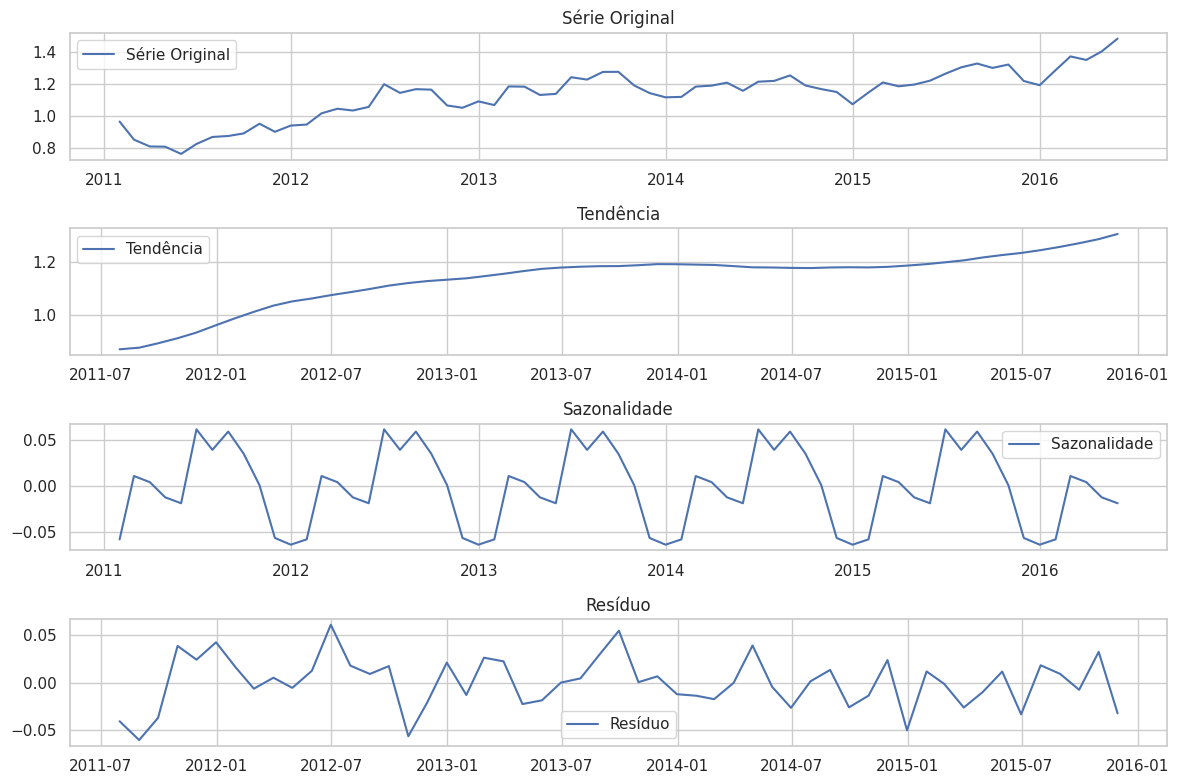

In [38]:
df_mensal = df['value'].resample('M').mean()
result = seasonal_decompose(df_mensal, model='additive')

plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df_mensal, label='Série Original')
plt.title('Série Original')
plt.legend()

plt.subplot(412)
plt.plot(result.trend, label='Tendência')
plt.title('Tendência')
plt.legend()

plt.subplot(413)
plt.plot(result.seasonal, label='Sazonalidade')
plt.title('Sazonalidade')
plt.legend()

plt.subplot(414)
plt.plot(result.resid, label='Resíduo')
plt.title('Resíduo')
plt.legend()

plt.tight_layout()
plt.show()

 ### ACF e PACF

In [39]:
def acf_pacf(x, qtd_lag):
    fig = plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(221)
    fig = sm.graphics.tsa.plot_acf(x, lags=qtd_lag, ax=ax1)
    ax2 = fig.add_subplot(222)
    fig = sm.graphics.tsa.plot_pacf(x, lags=qtd_lag, ax=ax2)
    plt.show()

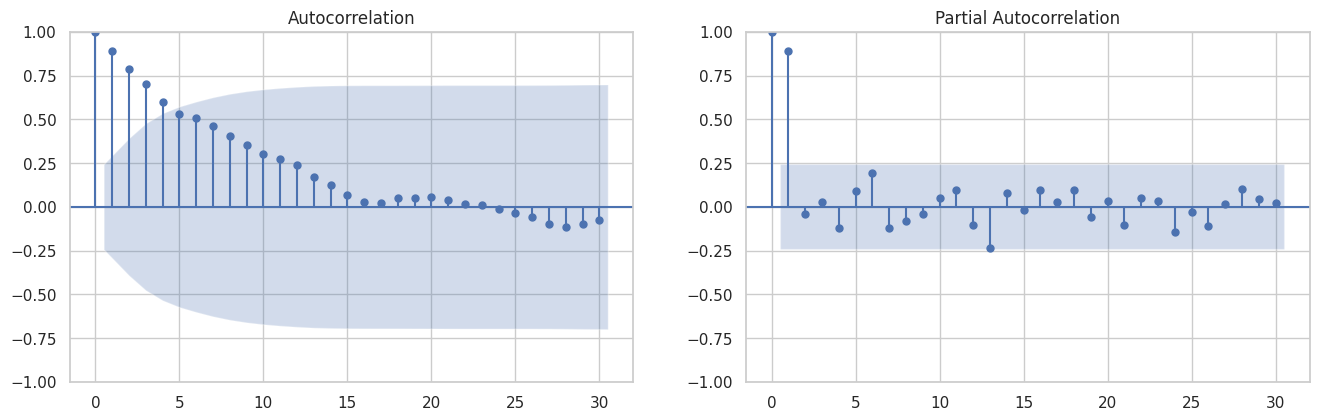

In [40]:
acf_pacf(df_mensal, 30)

##Resumo e Conclusões

A base de dados analisada refere-se ao número de vendas de produtos de uma loja no período de 29-01-2011 a 22-05-2016, contendo informações sobre o ID do item vendido, departamento, loja, e a venda diária de cada produto. As informações contidas na base dividem-se em 8 colunas (id, item_id, dept_id, cat_id, store_id, state_id, value, date), com um total de 59.181.090 linhas.

Na análise preliminar, não foram identificados valores nulos ou duplicados. Optou-se pela fragmentação da data em colunas separadas de mês e ano para facilitar o processo de algumas análises. Em uma análise geral do número de vendas mensais em cada ano, observamos oscilações mensais e crescimento no número de vendas a cada ano.

Ao observar o número de produtos vendidos por loja durante todo o período analisado, constatou-se que a loja com maior número de vendas é a CA_3, enquanto a com menor número de vendas é a CA_4. Os produtos do departamento FOODS_3 e da categoria FOODS têm um número de vendas muito superior aos demais. O estado com o maior número de vendas é a Califórnia (CA), seguido pelo Texas (TX) e Wisconsin (WI).

Os 100 itens mais vendidos correspondem a quase 30% do total de vendas. Na análise das vendas por categoria, estado e loja de forma mensal durante todo o período, foram observados picos de altas expressivos a partir do ano de 2016. Na análise da média móvel das vendas, consideramos uma janela de 3 meses, onde obtivemos um bom ajuste dos dados da média em relação aos dados reais, com leves oscilações. O mesmo padrão foi observado na média móvel em relação às vendas por categoria.

Na análise da decomposição sazonal da série temporal, utilizamos o modelo aditivo, onde a série original é a soma da tendência, sazonalidade e resíduo das vendas. A partir da decomposição, observamos uma tendência de crescimento com flutuações ao longo dos anos, sugerindo a presença de sazonalidade.

A combinação do decaimento gradual na ACF (Autocorrelation Function) e do corte abrupto na PACF (Partial Autocorrelation Function) após o lag 1 sugere que um modelo Autoregressivo (AR) de ordem 1, ou seja, AR(1), pode ser adequado para modelar essa série temporal. No modelo AR(1), o valor atual da série é influenciado apenas pelo valor imediatamente anterior, e essa influência diminui exponencialmente à medida que nos afastamos no tempo.